In [2]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from collections import Counter

current_local = locale.getlocale()
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Introducir ruta al archivo CSV Unificado
df = pd.read_csv('../datasets/diputados/diputados_dip/intervenciones.csv', delimiter='\t')


print(f'Hay {df.shape[0]} filas y {df.shape[1]} columnas')
df = df.dropna(subset=['texto'])
print(f'Tras eliminar las filas con texto nulo, quedan {df.shape[0]} filas')
df


Hay 12633 filas y 10 columnas
Tras eliminar las filas con texto nulo, quedan 12573 filas


,numero_diario,tipo_sesion,organo,fecha,tipo_iniciativa,materias,extracto,proponentes,interviniente,texto
0,39,ordinaria,pleno,11-marzo-2009,Comparecencias,"Compensación financiera, Hacienda regional, Mo...",8-09/APP-000038 y 8-09/APP-000047. Comparecenc...,NaN,PEDRO-VAQUERO-POZO,"-Gracias, señora Presidenta. Señor Vicepreside..."
1,555,ordinaria,Comisión de Hacienda y Administración Pública,18-octubre-2011,Cámara de Cuentas de Andalucía,"Administración municipal, Empresa pública, Ver...","8-09/OICC-000015, 8-09/OICC-000021, 8-10/OICC-...",NaN,ANTONIA-JESÚS-MORO-CÁRDENO,"—Gracias, señor Presidente. Señor Presidente d..."
2,139,ordinaria,pleno,15-diciembre-2011,Preguntas orales,"Competición deportiva, Deporte profesional, Tu...",8-11/POP-000564. Pregunta oral relativa al imp...,"el Ilmo. Sr. D. Juan Ignacio Zoido Álvarez, de...",LUCIANO-ALONSO-ALONSO,"-Gracias, Presidenta. El Consejo de Gobierno s..."
3,492,ordinaria,Comisión de Agricultura y Pesca,27-abril-2011,Preguntas orales,Industria alimentaria,8-11/POC-000258. Pregunta oral relativa al sec...,"el Ilmo. Sr. D. Bartolomé Madrid Olmo, del G.P...",CLARA-EUGENIA-AGUILERA-GARCÍA,"—Muchas gracias, señor Presidente. Sí, señor M..."
4,507,ordinaria,Comisión de Cultura,2-junio-2011,Proposiciones no de ley,"Industria minera, Patrimonio arquitectónico, P...",8-11/PNLC-000054. Proposición no de ley relati...,el G.P. Popular de Andalucía.,AMELIA-PALACIOS-PÉREZ,"—Gracias, señora Presidenta. Señorías, tomo la..."
...,...,...,...,...,...,...,...,...,...,...
12628,42,ordinaria,pleno,26-marzo-2009,Preguntas orales,"Cargo local, Comunicado de prensa, Derechos de...",8-09/POP-000143. Pregunta oral relativa a las ...,los Ilmos. Sres. D. Manuel Gracia Navarro y Dñ...,MICAELA-NAVARRO-GARZÓN,"-Muchas gracias, señor Presidente. Decir, seño..."
12629,139,ordinaria,pleno,15-diciembre-2011,Mociones,"Ayuda a las empresas, Fraude comercial, Políti...",8-11/M-000012. Moción relativa a política gene...,el G.P. Popular de Andalucía.,IVÁN-MARTÍNEZ-IGLESIAS,"-Muchas gracias, señora Presidenta. Señorías. ..."
12630,585,ordinaria,Comisión de Hacienda y Administración Pública,13-diciembre-2011,Proyectos de ley,"Ayuda a los discapacitados, Déficit presupuest...",8-11/PL-000012. Dictamen de la Comisión sobre ...,NaN,IGNACIO-GARCÍA-RODRÍGUEZ,"—Gracias, señor Presidente. Bien, en el punto ..."
12631,580,ordinaria,Comisión de Hacienda y Administración Pública,29-noviembre-2011,Comparecencias,"Concurso de traslado, Función pública, Tribuna...",8-11/APC-000525 y 8-11/APC-000546. Comparecenc...,NaN,CARMEN-MARTÍNEZ-AGUAYO,"—Muchas gracias, señor Presidente. Señorías. L..."


In [3]:
# Calculamos el número medio de intervenciones por interventor
intervenciones_interventor = df.groupby('interviniente').size()
media_intervenciones = intervenciones_interventor.mean()
print(f'El número medio de intervenciones por interventor es de {media_intervenciones:.2f}')

#Desviación tipica y mediana
std_intervenciones = intervenciones_interventor.std()
mediana_intervenciones = intervenciones_interventor.median()
print(f'La desviación típica del número de intervenciones por interventor es de {std_intervenciones:.2f}')
print(f'La mediana del número de intervenciones por interventor es de {mediana_intervenciones:.2f}')

# Cual es el interventor que más intervenciones ha realizado
interventor_mas_intervenciones = intervenciones_interventor.idxmax()
num_intervenciones = intervenciones_interventor.max()
print(f'El interventor que más intervenciones ha realizado es {interventor_mas_intervenciones} con {num_intervenciones} intervenciones')



El número medio de intervenciones por interventor es de 31.43
La desviación típica del número de intervenciones por interventor es de 59.08
La mediana del número de intervenciones por interventor es de 1.00
El interventor que más intervenciones ha realizado es IGNACIO-GARCÍA-RODRÍGUEZ con 379 intervenciones


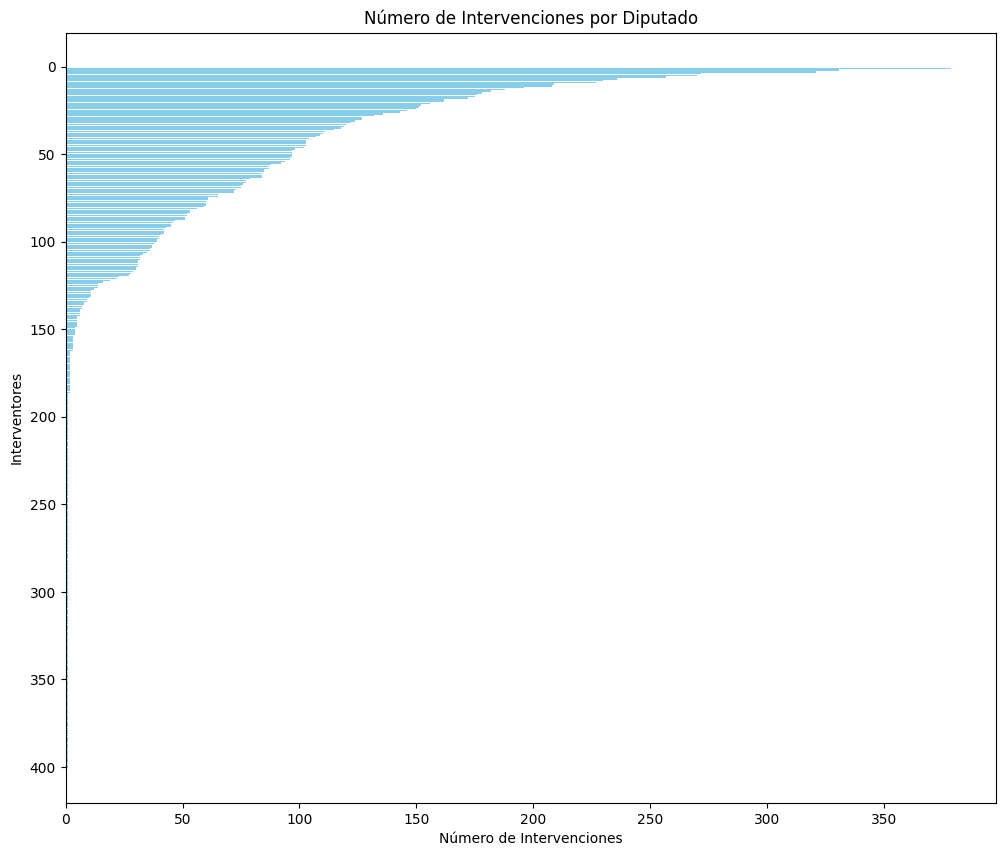

In [4]:
# Agrupar por diputado y contar el número de intervenciones
intervenciones_por_diputado = df['interviniente'].value_counts()

# Crear un DataFrame para facilitar la manipulación
df_intervenciones = intervenciones_por_diputado.reset_index()
df_intervenciones.columns = ['Diputado', 'Intervenciones']

# Añadir una columna numérica para representar a los diputados
df_intervenciones['Número de Diputado'] = range(1, len(df_intervenciones) + 1)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 10))
plt.barh(df_intervenciones['Número de Diputado'], df_intervenciones['Intervenciones'], color='skyblue')

plt.xlabel('Número de Intervenciones')
plt.ylabel('Interventores')
plt.title('Número de Intervenciones por Diputado')

# Invertir el eje Y para que el mayor número de intervenciones esté en la parte superior
plt.gca().invert_yaxis()

plt.show()


In [5]:
#Obtener la longitud media de cada intervención en palabras
df['longitud'] = df['texto'].str.split().apply(len)
longitud_media = df['longitud'].mean()
desviacion_tipica = df['longitud'].std()
print(f'La longitud media de las intervenciones es de {longitud_media:.2f} palabras')
print(f'La desviación típica de la longitud de las intervenciones es de {desviacion_tipica:.2f} palabras')

# Obtener la moda de la longitud de las intervenciones
longitud_moda = df['longitud'].median()
print(f'La moda de la longitud de las intervenciones es de {longitud_moda} palabras')


# El texto más largo del corpus es
texto_mas_largo = df.loc[df['longitud'].idxmax()]['texto']
print(f'El texto más largo del corpus es:\n\n{texto_mas_largo}')

La longitud media de las intervenciones es de 1527.22 palabras
La desviación típica de la longitud de las intervenciones es de 1673.12 palabras
La moda de la longitud de las intervenciones es de 1023.0 palabras
El texto más largo del corpus es:

-Señora Presidenta, señoras y señores diputados. Me van a permitir iniciar mi intervención sobre el estado de la Comunidad solicitando la colaboración de todos los grupos políticos que estamos aquí representados. Colaboración en la crítica, colaboración en las propuestas, en las coincidencias y en las discrepancias. Pero, sobre todo, colaboración para hacer de este un debate sobre los problemas de Andalucía, de los andaluces y de las andaluzas y sobre las distintas alternativas que podemos ofrecerles. Porque el debate en el que nos encontramos hoy así lo merece, porque los ciudadanos así lo reclaman y porque, sin lugar a dudas, nuestro deber como políticos también nos lo exige. Somos una Comunidad, Andalucía, que basa su autogobierno en la demo

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


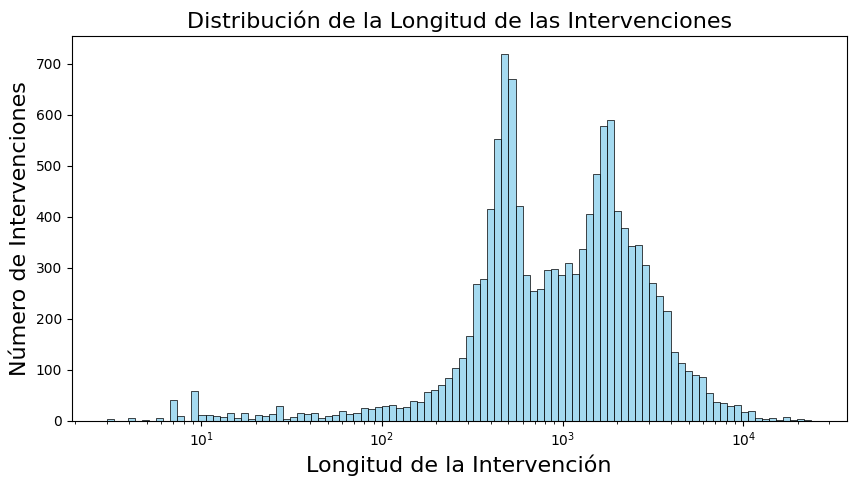

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['longitud'], bins=100, color='skyblue', log_scale=(True, False))
plt.xlabel('Longitud de la Intervención', fontdict={'fontsize': 16})
plt.ylabel('Número de Intervenciones', fontdict={'fontsize': 16})
plt.title('Distribución de la Longitud de las Intervenciones' , fontdict={'fontsize': 16})




plt.savefig('../../memoria/imagenes/distPalabras.eps', format='eps')

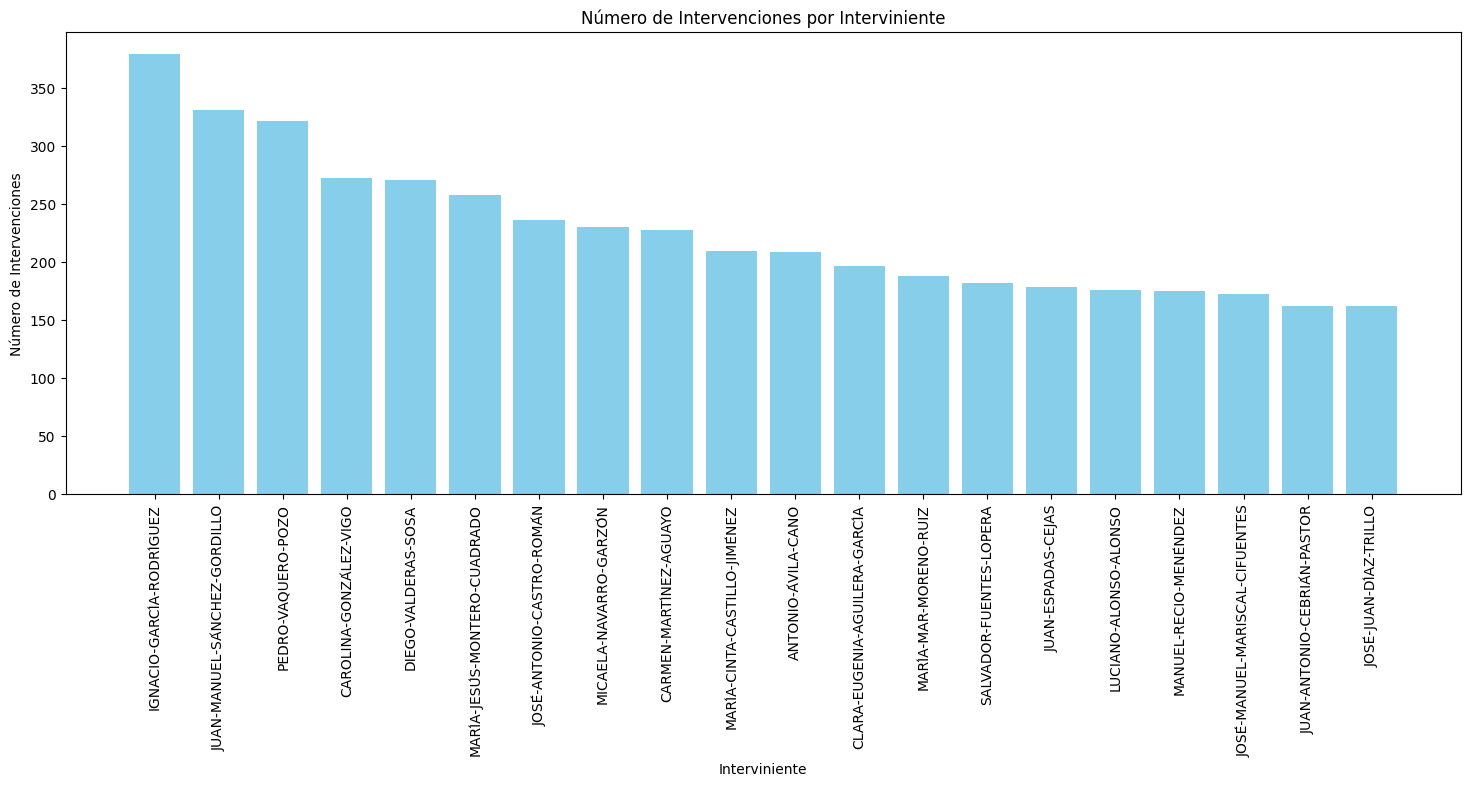

In [7]:
# Ver que diputados hablan más
conteo_intervenciones = df.groupby('interviniente').size()
conteo_intervenciones = conteo_intervenciones.sort_values(ascending=False)

df_conteo_intervenciones = conteo_intervenciones.reset_index()
df_conteo_intervenciones.columns = ['Interviniente', 'Intervenciones']


top_intervinientes = df_conteo_intervenciones.head(20)
plt.figure(figsize=(18, 6))
plt.bar(top_intervinientes['Interviniente'], top_intervinientes['Intervenciones'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Interviniente')
plt.ylabel('Número de Intervenciones')
plt.title('Número de Intervenciones por Interviniente')
plt.savefig('../../memoria/imagenes/top20.png', format='png')

In [12]:
# Cargamos las palabras vacías y actualizamos unas cuantas más que no se consideran pero que son muy usadas
stop_words = set(stopwords.words('spanish'))
palabras_extra = ['si', 'así', 'sí', 'ser', 'puede', 'hacer', 'hace', 'hacerlo', 'hacerla', 'hacerse', 
                  'hacerlas', 'hacerlos', 'hacerse', 'hacerme', 'hacernos', 'haceros', 'hacerle',
                  'usted', 'ustedes', 'nosotros', 'nosotras', 'vosotros', 'vosotras', 'mí', 'míos', 'mías',
                  'pues','gracias', 'y', 'señor', 'señora', 'señoría', 'señorías', 'señores', 'señoras', 'Y',
                  'por','en', 'el','andalucía', 'En', 'El', 'Por', 'Pero', 'pero', 'que', 'Que', 'qué', 'Qué', 
                  'No', 'no', 'nos', 'Nos', 'nosotras', 'Nosotras', 'nosotros', 'Nosotros', 'vosotros', 'Vosotros', 
                  'vosotras', 'Vosotras', 'vos', 'Vos', 'vosotras', 'Vosotras', 'vosotros', 'Vosotros', 'tú', 'Tú', 
                  'tus', 'Tus', 'tu', 'Tu', 'te', 'Te', 'Yo', 'yo', 'mío', 'mía', 'míos', 'mías', 'mí', 'Mí', 'la', 'La'
                  'es', 'Es', 'va', 'Va', 'además', 'Además', 'vamos', 'Vamos', 'creo', 'Creo']
stop_words.update(palabras_extra)

df['tokens'] = df['texto'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word not in stop_words])


/var/folders/2m/mlv2fsg14t52l377d2x2_5t40000gn/T/ipykernel_70086/659398963.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=60)


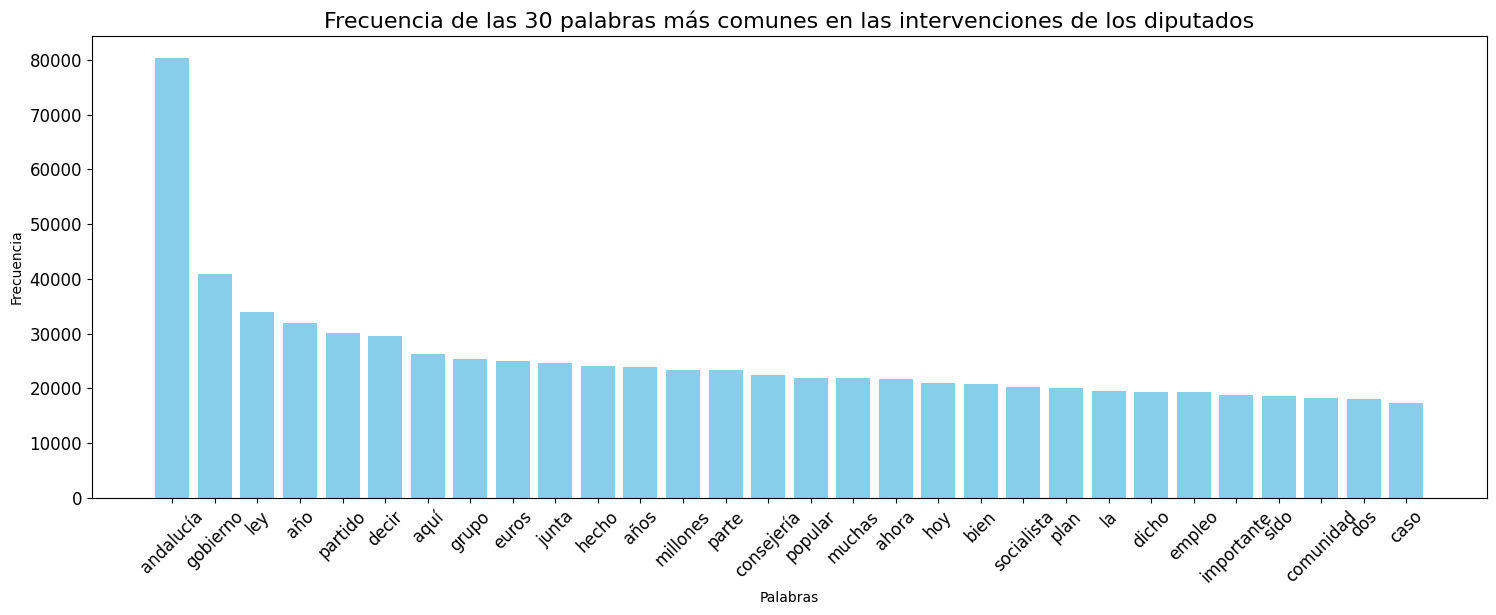

In [13]:
plt.figure(figsize=(18, 6))

contador_palabras = Counter(palabra for palabras in df['tokens'] for palabra in palabras)
top_palabras = contador_palabras.most_common(30)

palabras, counts = zip(*top_palabras)
plt.bar(palabras, counts, color='skyblue')
plt.xticks(rotation=45, ha='center', fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las 30 palabras más comunes en las intervenciones de los diputados', fontsize=16)
plt.tight_layout(pad=60)

plt.savefig('../../memoria/imagenes/topPalabras.png', format='png')

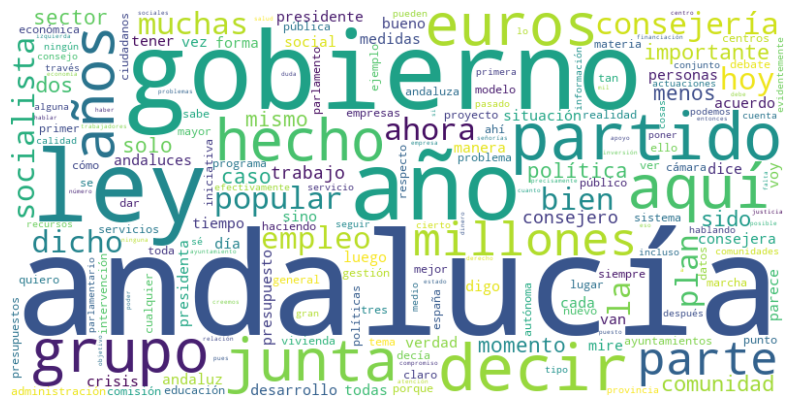

<Figure size 640x480 with 0 Axes>

In [14]:
from wordcloud import WordCloud

WordCloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate_from_frequencies(contador_palabras)

plt.figure(figsize=(10, 6))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.savefig('../../memoria/imagenes/wordcloud.png', format='png')

La primera intervención en el corpus es del 03 de abril de 2008
La última intervención en el corpus es del 25 de enero de 2012


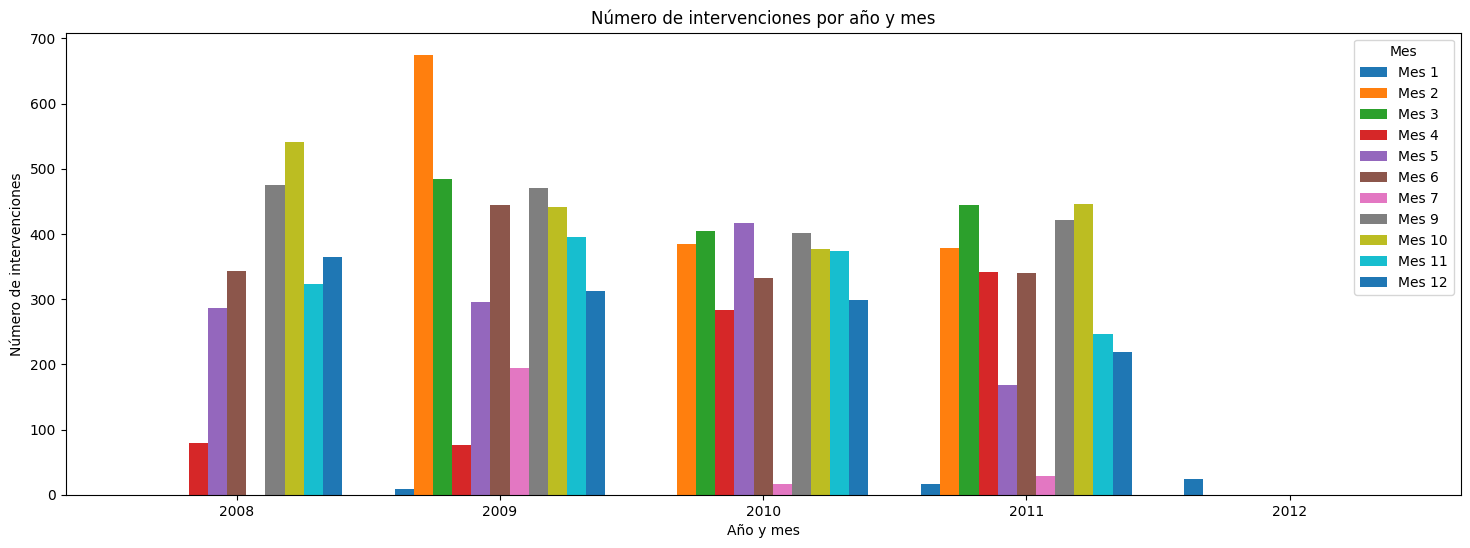

<Figure size 640x480 with 0 Axes>

In [15]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%B-%Y')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['día'] = df['fecha'].dt.day

# Fecha de la primera intervención
primera_intervencion = df['fecha'].min()
print(f'La primera intervención en el corpus es del {primera_intervencion:%d de %B de %Y}')

# Fecha de la última intervención
ultima_intervencion = df['fecha'].max()
print(f'La última intervención en el corpus es del {ultima_intervencion:%d de %B de %Y}')


intervenciones_por_año_mes = df.groupby(['año', 'mes']).size().unstack().fillna(0)

ax = intervenciones_por_año_mes.plot(kind='bar', figsize=(18, 6), width=0.8)
plt.title('Número de intervenciones por año y mes')
plt.xlabel('Año y mes')
plt.ylabel('Número de intervenciones')
plt.legend(title='Mes', labels =[f'Mes {int(mes)}' for mes in intervenciones_por_año_mes.columns])
plt.xticks(rotation=0)
plt.show()

plt.savefig('../../memoria/imagenes/intervencionesAñoMes.eps', format='eps')